In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

import os
from scipy.sparse import coo_matrix


# Initialization

In [ ]:
train_data = pd.read_csv('uncleaned_data.tsv', sep = '\t')

In [ ]:
train_data = train_data[['Uniq Id', 'Product Id', 'Product Rating', 'Product Reviews Count', 'Product Category', 'Product Brand', 'Product Name', 'Product Image Url', 'Product Description', 'Product Tags' ]]


In [ ]:
train_data.isnull().sum()

In [27]:
# Filling missing values in data frame
train_data.fillna({'Product Rating' : 0}, inplace = True)
train_data.fillna({'Product Reviews Count' : 0}, inplace = True)
train_data.fillna({'Product Category' : ''}, inplace = True)
train_data.fillna({'Product Brand' : ''}, inplace = True)
train_data.fillna({'Product Description' : 0}, inplace = True)


In [13]:
column_name_mapping = {
    'Uniq Id':'ID',
    'Product Id' : 'ProdID',
    'Product Rating' : 'Rating',
    'Product Reviews Count' : 'ReviewCount',
    'Product Category' : 'Category',
    'Product Brand' : 'Brand',
    'Product Name' : 'Name',
    'Product Image Url' : 'ImageURL',
    'Product Description' : 'Description',
    'Product Tags' : 'Tags',
    'Product Contents' : 'Contents'

}

In [30]:
train_data.rename(columns=column_name_mapping, inplace=True)

In [31]:
train_data['ID'] = train_data['ID'].str.extract(r'(\d+)').astype(float)
train_data['ProdID'] = train_data['ProdID'].str.extract(r'(\d+)').astype(float)


# Random visualizations cuz I feel lazy right now to do more 

## Statistics 

In [32]:
number_users = train_data['ID'].nunique()
number_items = train_data['ProdID'].nunique()
number_ratings = train_data['Rating'].nunique()
print (f"Unique users : {number_users}")
print (f"Unique items : {number_items}")
print (f"Unique ratings : {number_ratings}")


Unique users : 1721
Unique items : 1697
Unique ratings : 35


## Heatmap

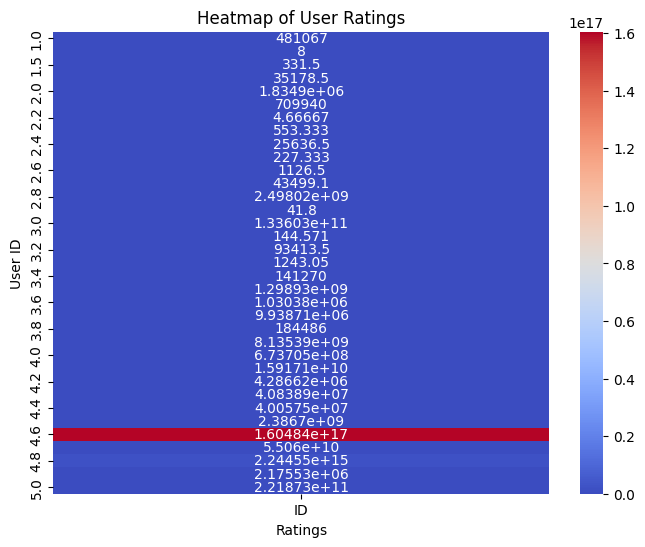

In [33]:
heatmap_data = train_data.pivot_table('ID', 'Rating')

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt='g', cmap = 'coolwarm', cbar=True)
plt.title('Heatmap of User Ratings')
plt.xlabel('Ratings')
plt.ylabel('User ID')
plt.show()

## Distribution of Interactions

In [1]:
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
train_data['ID'].value_counts().plot(kind='hist', bins=10, edgecolor='k')
plt.xlabel('Interactions per User')
plt.ylabel('Number of Items')
plt.title('Distribution of Interaction per User')

plt.tight_layout()
plt.show()


NameError: name 'plt' is not defined